**NLP Mini Project**


---


**Hardik Singh (16010420050)**
**& Mayank Pujara (16010420057)**

**Importing necessary libraries**

In [1]:
import pandas as pd
import nltk

**Reading a CSV file containing tweets into a Pandas DataFrame and display the first few rows**

In [2]:
tweets=pd.read_csv('/content/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**The number of rows and columns of the DataFrame**

In [3]:
tweets.shape

(14640, 15)

# **Data Preprocessing**

**Filtering the DataFrame to keep only rows with 'airline_sentiment_confidence' greater than or equal to 0.5**

In [4]:
tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)
tweets_df.shape

(14404, 15)

**Extracting the 'text' column (tweets) and 'airline_sentiment' column (sentiment labels)**

In [5]:
X=tweets_df['text']
y=tweets_df['airline_sentiment']

# **Cleaning the Text Data using NLTK libraries**

**Importing NLTK libraries for text processing**

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning the tweet text data by removing non-alphabetic characters, converting to lowercase, tokenizing, stemming, and removing stop words and punctuation**

In [7]:
import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)

In [8]:
cleaned_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take anoth trip',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica know suicid second lead caus death among teen',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'vir

In [9]:
y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

**A list to specify the order of sentiment labels**

In [10]:
sentiment_ordering = ['negative', 'neutral', 'positive']

**Mapping the sentiment labels in 'y' to their corresponding index in 'sentiment_ordering'**

In [11]:
y = y.apply(lambda x: sentiment_ordering.index(x))
y.head()

0    1
2    1
3    0
4    0
5    0
Name: airline_sentiment, dtype: int64

**Import CountVectorizer from scikit-learn for text feature extraction**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray() # Transforming the cleaned tweet data into a numerical matrix
X_fin.shape

(14404, 3000)

**Import Multinomial Naive Bayes classifier and training the model**

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
model=MultinomialNB()
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB()

**Making predictions on the test data**

In [14]:
y_pred=model.predict(X_test)

**Import classification_report from scikit-learn to generate a classification report and print the results**

In [15]:
from sklearn.metrics import classification_report
final_report=classification_report(y_test,y_pred)
print(final_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2770
           1       0.64      0.50      0.56       905
           2       0.69      0.70      0.70       647

    accuracy                           0.78      4322
   macro avg       0.72      0.70      0.71      4322
weighted avg       0.77      0.78      0.77      4322



# **Data Visualization**

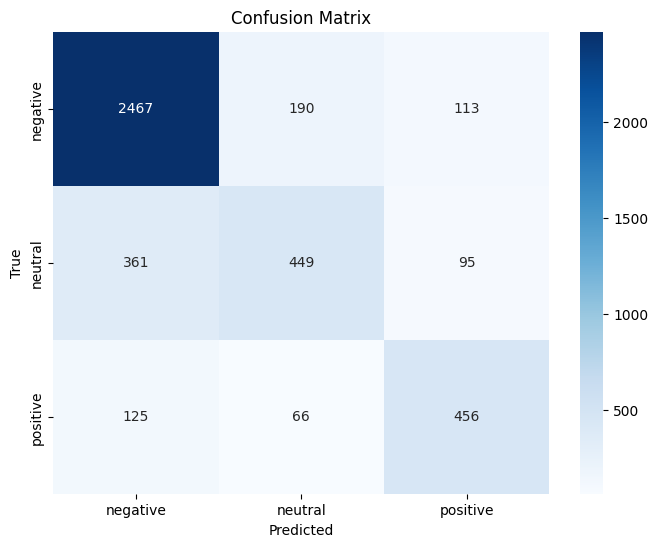

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
labels = sentiment_ordering
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

* This generates a heatmap of the confusion matrix, which helps you visualize how well your model is performing in classifying the sentiments.
* It shows the true positive, true negative, false positive, and false negative values for each sentiment class.